# TensorFlow Assignment: Multi-Layer Perceptron (MLP)

Name: Yuantong Ding

### Multi-layer Perceptron

Build a 2-layer MLP for MNIST digit classfication. Feel free to play around with the model architecture and see how the training time/performance changes, but to begin, try the following:

Image (784 dimensions) -> fully connected layer (500 hidden units)  -> nonlinearity (ReLU) -> fully connected layer (100 hidden units) -> nonlinearity (ReLU) -> fully connected (10 hidden units) -> softmax

In [6]:
import tensorflow as tf
from tqdm import trange
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [159]:
# Define model
tf.reset_default_graph()
g = tf.get_default_graph()

X = tf.placeholder(tf.float32,[None,784]) #minibatch x size of images
y = tf.placeholder(tf.float32,[None,10]) # 10 classes of digits

W1 = tf.Variable(tf.truncated_normal([784,500],stddev=0.1)) # L1 weights
b1 = tf.Variable(tf.truncated_normal([500],stddev=0.1)) # L1 bias
latent_scores_1 = tf.nn.relu(tf.add(tf.matmul(X,W1),b1)) # ReLu 1

W2 = tf.Variable(tf.truncated_normal([500,100],stddev=0.1)) # L2 weights
b2 = tf.Variable(tf.truncated_normal([100],stddev=0.1)) # L2 bias
latent_scores_2 = tf.nn.relu(tf.add(tf.matmul(latent_scores_1,W2),b2)) # ReLu 2

W3 = tf.Variable(tf.truncated_normal([100,10],stddev=0.1)) # L2 weights
b3 = tf.Variable(tf.truncated_normal([10],stddev=0.1)) # L2 bias
scores = tf.add(tf.matmul(latent_scores_2,W3),b3) # ReLu 2
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=scores, labels=y) # softmax
avg_loss = tf.reduce_mean(loss)

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)


In [160]:
# create session
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [165]:
# run
for iter in trange(10):
    for i in range(550):
        batch_xs = mnist.train.images[i*100:(i+1)*100]
        batch_ys = mnist.train.labels[i*100:(i+1)*100]
        sess.run(train_step, feed_dict={X: batch_xs, y: batch_ys})


100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


In [166]:
sess.run(avg_loss, feed_dict={X:mnist.test.images[0:100],
                      y:mnist.test.labels[0:100]})



0.013374155

In [167]:
# Accuracy
computed_scores = sess.run(scores, feed_dict={X:mnist.test.images,
                      y:mnist.test.labels})
np.argmax(computed_scores,axis=1)

sum(np.argmax(computed_scores,axis=1)==np.argmax(mnist.test.labels,axis=1))


9781

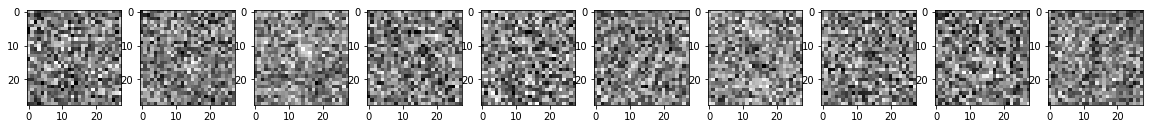

In [154]:
# Visualize the weights
%matplotlib inline
import matplotlib.pyplot as plt  

# Get weights
weights = sess.run(W1)

fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(weights[:,digit].reshape(28,28), cmap='gray')

# Close session to finish
sess.close()